In [473]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [474]:
from data_cleaner import clean_movie_budgets
from data_cleaner import clean_tmdb_movies
from data_cleaner import join_dataframes

In [475]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [476]:
#movie_gross_df = pd.read_csv('data/bom.movie_gross.csv')
# name_df = pd.read_csv('data/imdb.name.basics.csv')
# title_akas_df = pd.read_csv('data/imdb.title.akas.csv')
# title_basics_df = pd.read_csv('data/imdb.title.basics.csv')
# title_crew_df = pd.read_csv('data/imdb.title.crew.csv')
# title_principals_df = pd.read_csv('data/imdb.title.principals.csv')
# title_ratings_df = pd.read_csv('data/imdb.title.ratings.csv')
# rt_movie_info_df = pd.read_csv('data/rt.movie_info.tsv', delimiter='\t')
# rt_reviews_df = pd.read_csv('data/rt.reviews.tsv', encoding='windows-1254', delimiter='\t')
tmdb_movies_df = pd.read_csv('data/tmdb.movies.csv')
tn_budgets_df = pd.read_csv('data/tn.movie_budgets.csv')

In [477]:
clean_tmdb_movies_df = clean_tmdb_movies(tmdb_movies_df)
clean_tn_budgets_df = clean_movie_budgets(tn_budgets_df)

In [478]:
joined_movies_df = join_dataframes(clean_tmdb_movies_df, clean_tn_budgets_df)

In [479]:
joined_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 10 Cloverfield Lane to Zootopia
Data columns (total 10 columns):
genre_ids                     683 non-null object
popularity                    683 non-null float64
vote_average                  683 non-null float64
vote_count                    683 non-null int64
production_budget ($M)        683 non-null float64
domestic_gross ($M)           683 non-null float64
worldwide_gross ($M)          683 non-null float64
domestic_production_ratio     683 non-null float64
worldwide_production_ratio    683 non-null float64
worldwide_domestic_ratio      683 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 58.7+ KB


In [536]:
"""
x_axis and y_axis are column names in the joined data frame
genres is a list of genres to get information about
"""
def make_regplots(df, x_axis, y_xis, genres):
    fig, axs = plt.subplots(2,3, figsize = (16,12))
    for i, genre in enumerate(genres):
        row = i//3
        col = i%3
        axs[row,col].set_xlim(0,350)
        axs[row,col].set_ylim(0,20)
        axs[row,col].set_title(f'{y_axis} vs {x_axis} for {genre}')
        plot_df = df[df['genre_ids'].apply(lambda x: genre in x)]
        sns.regplot(plot_df[x_axis],plot_df[y_axis], 
                    ax = axs[row,col])
        
    plt.tight_layout()

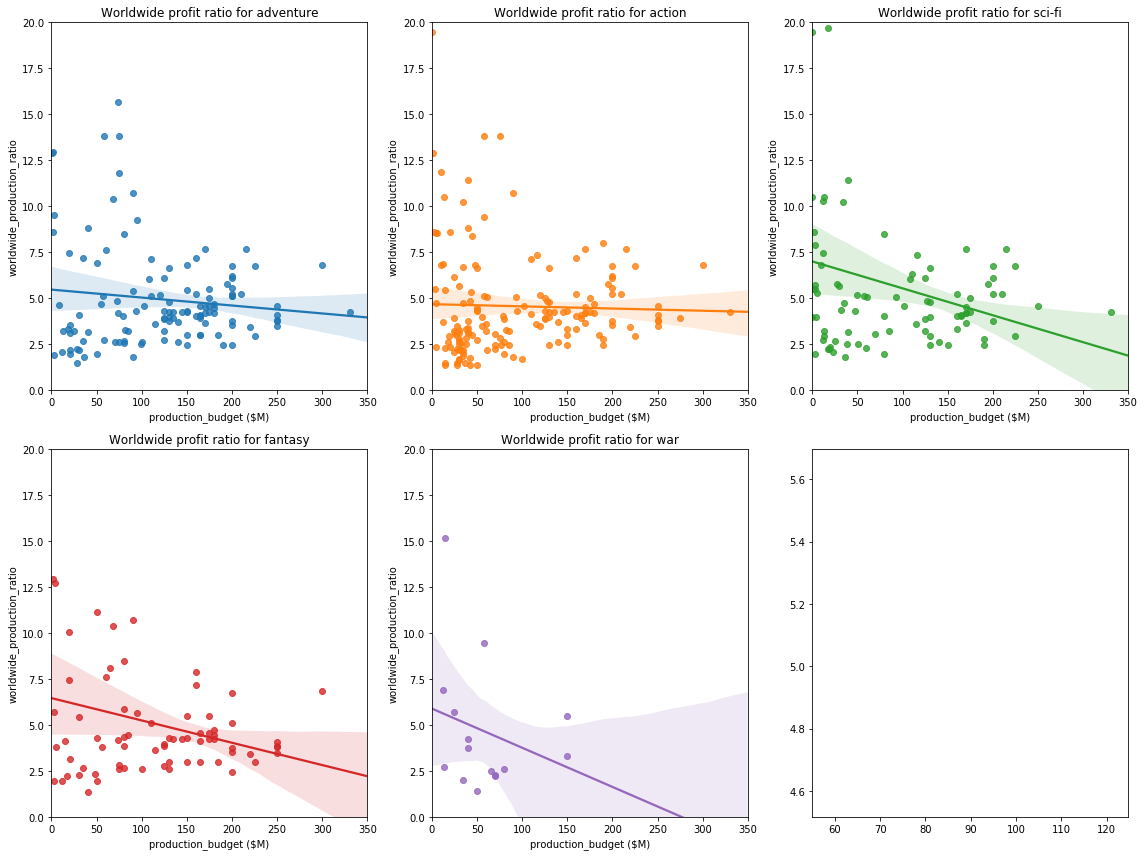

In [535]:
make_regplots(joined_movies_df, '', ['adventure', 'action', 'sci-fi', 'fantasy', 'war'])

In [493]:
def plot_genre_stats(col_name):
    gneres = None
    col_name_dict = {}
    genre_count_dict = {}
    
    for i, genres in enumerate(joined_movies_df.genre_ids):
        for genre in genres:
            if genre not in col_name_dict.keys():
                col_name_dict[genre] = joined_movies_df[col_name].iloc[i]
                genre_count_dict[genre] = 1
            else:
                col_name_dict[genre] += joined_movies_df[col_name].iloc[i]
                genre_count_dict[genre] += 1
                
    avg_stats = {k: col_name_dict[k] / genre_count_dict[k] for k \
               in col_name_dict if k in genre_count_dict}
    
    sorted_stats = sorted(avg_stats.items(), key = lambda kv: kv[1])
    genres, stats = zip(*sorted_stats)
    
    plt.figure(figsize = (12,4))
    plt.barh(range(len(avg_stats))[12:19], stats[12:19], align = 'center')
    plt.yticks(range(len(avg_stats))[12:19], genres[12:19]);
    plt.title(f'Avg {col_name} for All Movies by Genre')
    plt.ylabel('Genre')
    plt.xlabel(f'Average {col_name}')

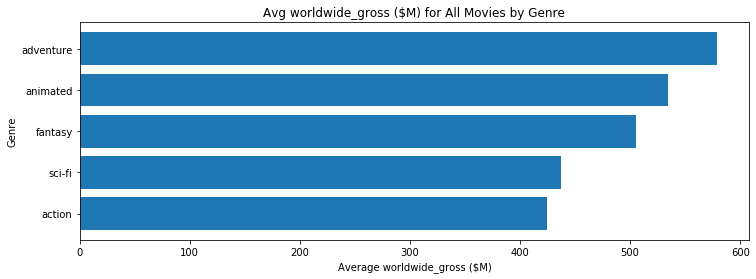

In [494]:
plot_genre_stats('worldwide_gross ($M)')

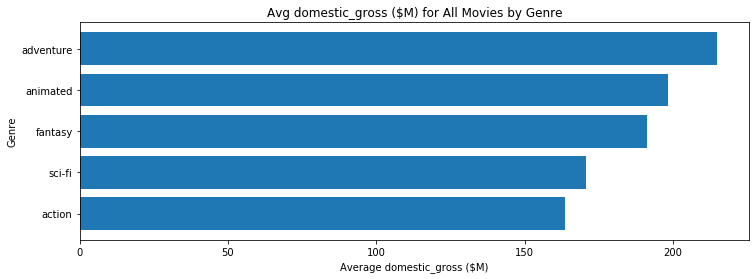

In [495]:
plot_genre_stats('domestic_gross ($M)')

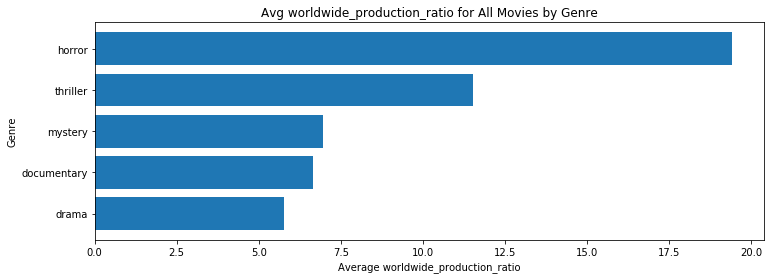

In [496]:
plot_genre_stats('worldwide_production_ratio')

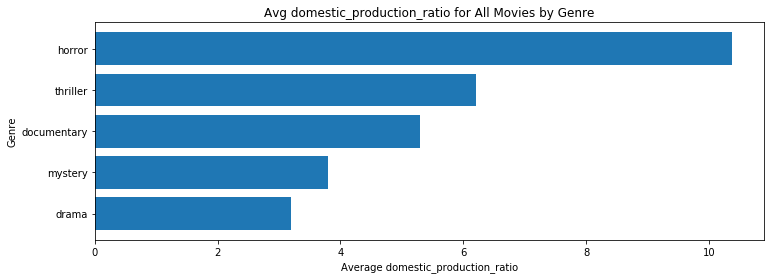

In [497]:
plot_genre_stats('domestic_production_ratio')

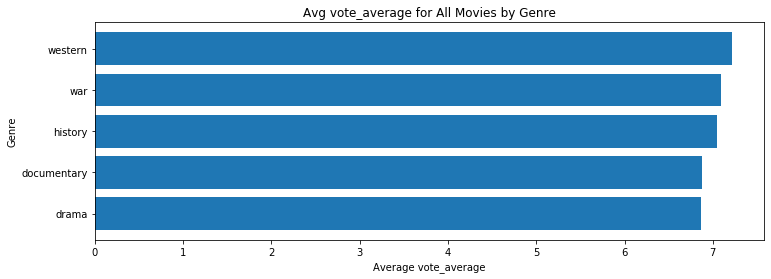

In [498]:
#Not correct. Needs to have vote count filtered
plot_genre_stats('vote_average')

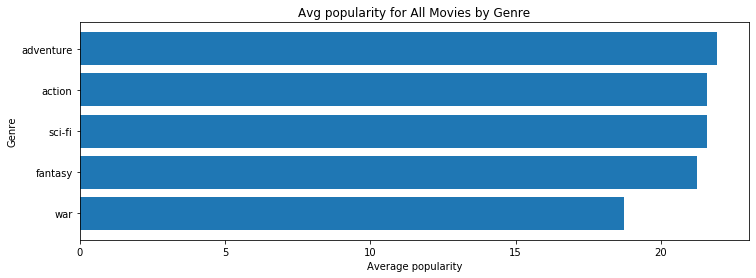

In [507]:
plot_genre_stats('popularity')

In [500]:
joined_movies_df.head()

,genre_ids,popularity,vote_average,vote_count,production_budget ($M),domestic_gross ($M),worldwide_gross ($M),domestic_production_ratio,worldwide_production_ratio,worldwide_domestic_ratio
title,,,,,,,,,,
10 Cloverfield Lane,"[thriller, sci-fi, drama]",17.892,6.9,4629,5.0,72.1,108.3,14.42,21.66,1.50
12 Strong,"[war, drama, history, action]",13.183,5.6,1312,35.0,45.8,71.1,1.31,2.03,1.55
12 Years a Slave,"[drama, history]",16.493,7.9,6631,20.0,56.7,181.0,2.84,9.05,3.19
127 Hours,"[adventure, drama, thriller]",11.435,7.0,4469,18.0,18.3,60.2,1.02,3.34,3.29
13 Hours: The Secret Soldiers of Benghazi,"[action, drama, history, thriller, war]",21.486,7.0,1573,50.0,52.9,69.4,1.06,1.39,1.31
